# Understanding `pytrends`: A Tool for Google Trends Data in Python

The `pytrends` library is a simple yet powerful Python interface to Google Trends, providing easy access to trending data directly from Google. It allows users to track keyword popularity, compare trends, and analyze search patterns over time, making it a valuable tool for anyone interested in consumer interest, market analysis, or content creation.

---

## Installation

To install `pytrends`, you can use pip:

```python
pip install pytrends


## Setting Up and Authentication :

Google Trends doesn’t require a Google account, so `pytrends` works without needing to log in. However, it connects via an automated session, and you need to establish this session each time you use it. Here’s how you start:

In [4]:
from pytrends.request import TrendReq

# Establish a session with Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# hl: Sets the language (default is 'en-US').
# tz: Sets the time zone (default is 360, which corresponds to UTC+6).

## Key Functions of `pytrends`
1. **Building a Payload**

The first step in using `pytrends` is to build a payload, which specifies the keywords you want to track and analyze.

```python
pytrends.build_payload(kw_list=['Python', 'Data Science'], cat=0, timeframe='today 12-m', geo='US', gprop='')
```

*   `kw_list`: List of keywords (up to 5) to track.
*   `cat`: Google Trends category ID (default is 0, which covers all categories)
*   `timeframe`: Specifies the time range for analysis (e.g., 'today 12-m' for the last 12 months).
* `geo` : Limits the search to a specific region (e.g., 'US' for the United States).
* `gprop` : Restricts results to a specific Google property, like 'youtube' or 'news'.


---


2.  **Interest Over Time**

Get historical search interest data over the selected timeframe.
```python
data = pytrends.interest_over_time()
```
This function returns a DataFrame with interest scores and a timestamp index, allowing you to see trends over time.

---

3. **Interest by Region**

The first step in using `pytrends` is to build a payload, which specifies the keywords you want to track and analyze.

```python
region_data = pytrends.interest_by_region(resolution='COUNTRY')
```

*   `resolution` : Set to `'COUNTRY'`, `'REGION'`, or `'CITY'`.
---

4. **Related Queries**

Identify related queries for each keyword, which can help in understanding what people are searching for in relation to your keywords.

```python
related_queries = pytrends.related_queries()
```
This returns a dictionary where each key is a keyword and values include lists of top and rising queries.

---
5. **Trending Searches**

Get currently trending searches in a specific region.

```python
trending_searches = pytrends.trending_searches(pn='united_states')
```

*   `pn`: Specifies the location (e.g., `'united_states'`).
---
6. **Top Charts**

Retrieve Google’s top charts for different categories over a specified year.

```python
top_charts = pytrends.top_charts(2023, hl='en-US', tz=300, geo='GLOBAL')
```

*   `geo` : Limit by location (use `'GLOBAL'` for worldwide data).
---
7. **Interest by Category**

Get interest data filtered by a specific Google Trends category.

```python
pytrends.build_payload(kw_list=['Data Science'], cat=18)
category_interest = pytrends.interest_by_region()
```
---

This filters search interest by a specific topic area, giving you more context on how popular a topic is within certain industries.

8. **Suggestions**

Receive suggested queries based on an initial keyword to help refine your analysis.

```python
suggestions = pytrends.suggestions(keyword='Python')
```

This returns related search queries that may be useful in expanding your keywords list.

---



## Pros, Cons, and Limitations of `pytrends`

| Category      | Pros                                                                                       | Cons                                                                                     | Limitations                                                                                           |
|---------------|--------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Ease of Use**     | Easy to install and set up; requires no Google account login                         | Limited to Google Trends data only, so it lacks data from other platforms                | Cannot directly modify Google Trends algorithms                                                       |
| **Data Availability** | Access to historical and regional data for trend analysis                          | Only provides sampled data, which may not reflect the complete picture                   | Some regions or categories might have limited data available                                          |
| **Keyword Tracking**  | Allows tracking of multiple keywords simultaneously (up to 5 per query)           | Limited to 5 keywords at a time                                                          | Keywords must be specified in English or another major language, depending on language preference     |
| **Trend Analysis**    | Supports a variety of trend analyses (e.g., over time, by region, related queries) | Requires manual session setup each time due to no account linkage                        | Limited timeframe options for certain analyses; no custom timeframe selection                         |
| **Practical Applications** | Useful for market research, content creation, and competitive analysis      | Can only access public data, not proprietary or private search trends                    | Seasonal and localized trends may not be fully accurate due to data sampling                          |
| **Data Sampling**     | Provides trend insights without needing huge datasets or manual data collection   | Sampled data may not provide precise values                                             | Not ideal for cases requiring high-resolution or high-frequency data                                  |
| **Global Insights**   | Supports analysis in multiple regions, including by country, region, or city      | Some regions or countries may have incomplete data                                      | Restrictions in some locations where Google Trends data is less robust                                |
| **Time Efficiency**   | Quick, efficient data access with minimal API calls                               | Cannot handle large data requests; sometimes may experience rate limiting               | No batch processing or scheduling options for automated, periodic data retrieval                      |

---

This table provides a quick overview of what makes `pytrends` useful and where its limitations lie, helping users make informed decisions about whether it’s suitable for their specific use case.


In [5]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

In [22]:
# Establish a connection to Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keyword for analysis
keyword = ["Paiya Dei"]

# Function to get top 10 regions for a given geo (region code)
def get_top_regions(region):
    pytrends.build_payload(kw_list=keyword, cat=0, timeframe='today 3-m', geo=region, gprop='')
    data = pytrends.interest_by_region()
    data = data.sort_values(by="Paiya Dei", ascending=False)
    return data.head(10)

# 1. Global Analysis
print("Top 10 Regions Globally for 'Paiya Dei':")
global_data = get_top_regions("")
print(global_data)

# 2. India Analysis
print("\nTop 10 Regions in India for 'Paiya Dei':")
india_data = get_top_regions("IN")
print(india_data)

Top 10 Regions Globally for 'Paiya Dei':
                          Paiya Dei
geoName                            
Sri Lanka                       100
India                            41
Malaysia                         25
Qatar                            25
Singapore                        16
United Arab Emirates             16
North Korea                       0
Norfolk Island                    0
North Macedonia                   0
Northern Mariana Islands          0

Top 10 Regions in India for 'Paiya Dei':
                Paiya Dei
geoName                  
Tamil Nadu            100
Puducherry             98
Kerala                  6
Karnataka               6
Andhra Pradesh          3
Manipur                 0
Meghalaya               0
Mizoram                 0
Nagaland                0
Odisha                  0


# Analysis of Regional Interest in "Paiya Dei" Using Google Trends

## Global Analysis
- **Sri Lanka** has the highest interest in "Paiya Dei," with a score of 100, indicating peak interest. This suggests the song or phrase resonates most strongly here.
- **India** follows, with a relative interest score of 41, likely due to cultural familiarity with Tamil media.
- **Malaysia, Qatar, Singapore, and the UAE** show moderate interest (16 to 25), potentially due to cultural or linguistic connections.
- **North Korea, Norfolk Island, North Macedonia, and Northern Mariana Islands** show zero interest, which could be due to limited familiarity with Tamil culture or lack of access to related media.

## India-Specific Analysis
- **Tamil Nadu** shows the highest interest (score of 100), likely due to linguistic and cultural connections.
- **Puducherry** also has a high interest (score of 98), aligning with its Tamil-speaking population.
- **Kerala and Karnataka** show minimal interest (score of 6), possibly due to Tamil-speaking communities in these regions.
- **Andhra Pradesh** has very low interest (score of 3), suggesting limited appeal beyond Tamil Nadu.
- The remaining regions show zero interest, indicating limited exposure to or connection with the term.

## Summary
Overall, the data indicates that "Paiya Dei" is most popular within Tamil-speaking areas, particularly in **Sri Lanka, Tamil Nadu,** and **Puducherry**. The moderate interest in regions like **Malaysia** and **Singapore** could be due to Tamil diaspora populations.

---

## Possible Assumptions

1. **Cultural Familiarity:** The analysis assumes that interest is tied to cultural and linguistic familiarity. For instance, Tamil Nadu’s high interest is likely due to Tamil speakers, while regions with little or no Tamil-speaking populations show low interest.
  
2. **Access to Media Platforms:** Assumes that all regions with low interest might lack exposure due to limited access to platforms where "Paiya Dei" is popular.

3. **Diaspora Influence:** For countries like Malaysia, Qatar, and Singapore, moderate interest might stem from Tamil-speaking communities or the diaspora, as assumed here.

4. **Accuracy of Google Trends Data:** Assumes that Google Trends accurately reflects regional interest. This is subject to Google Trends' data accuracy and the frequency of searches within those regions.

5. **Timeframe Relevance:** Since the data is for the past 3 months, it assumes that the interest level is recent and might vary if a different timeframe were chosen.

6. **Population Proportion:** Assumes that regions with higher populations or internet usage might display proportionally higher scores, influencing the data distribution.

7. **Regional Interest Scaling:** Google Trends scales data to a maximum of 100 per region, so a score of 100 in Tamil Nadu and 100 in Sri Lanka represents the peak interest within each respective region rather than a direct comparison.


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


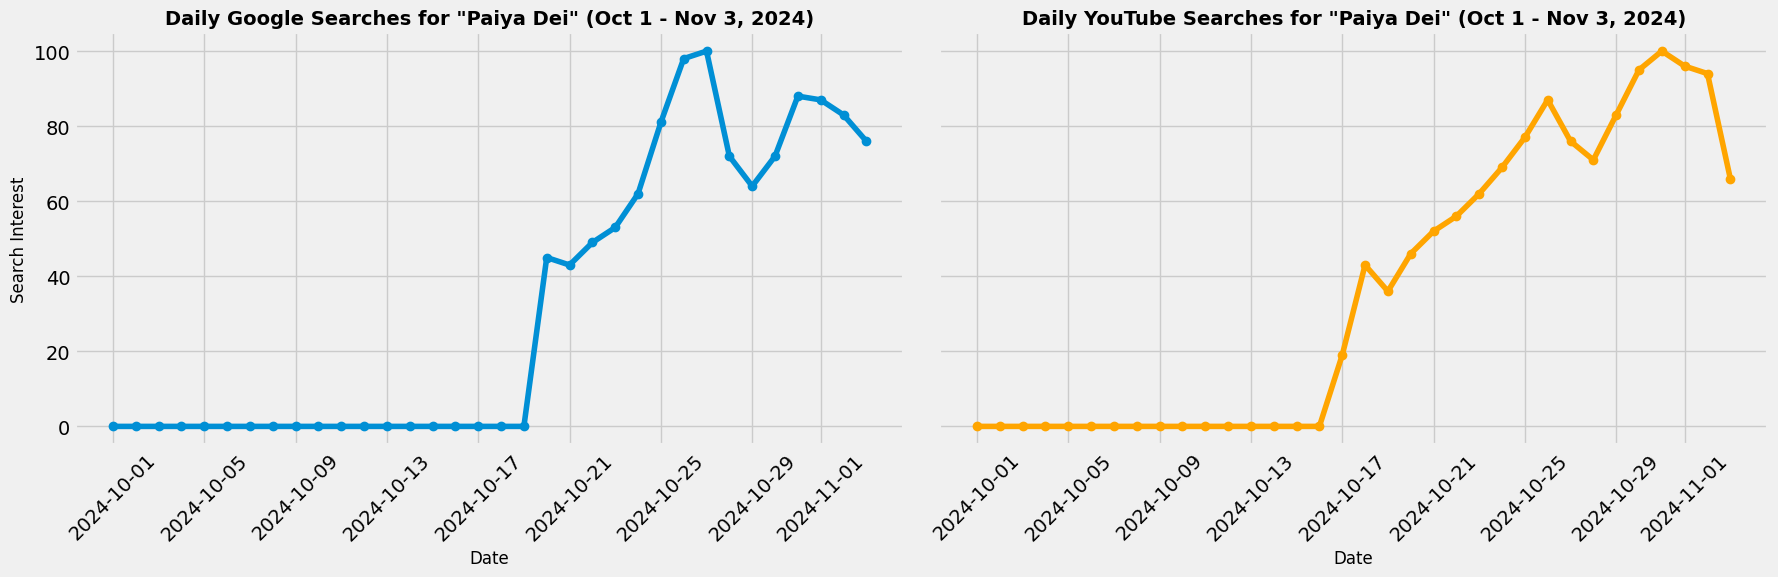

In [36]:
# Import necessary libraries
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)
keyword = ["Paiya Dei"]

# Set the date range
timeframe = '2024-10-01 2024-11-03'

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# --- Code 1: Google Searches ---
# Build payload and fetch interest over time for Google web search
pytrends.build_payload(kw_list=keyword, timeframe=timeframe)
data = pytrends.interest_over_time()

# Check if data is available
if not data.empty:
    if 'isPartial' in data.columns:
        data = data.drop(columns=['isPartial'])

    # Plot data
    axs[0].plot(data.index, data['Paiya Dei'], marker='o', linestyle='-')
    axs[0].set_title('Daily Google Searches for "Paiya Dei" (Oct 1 - Nov 3, 2024)', fontweight='bold', fontsize=14)
    axs[0].set_xlabel('Date', fontsize=12)
    axs[0].set_ylabel('Search Interest', fontsize=12)
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid(True)
else:
    print("No data available for Google web search in the specified timeframe.")

# --- Code 2: YouTube Searches ---
# Build payload and fetch interest over time for YouTube search
pytrends.build_payload(kw_list=keyword, timeframe=timeframe, gprop='youtube')
youtube_data = pytrends.interest_over_time()

# Check if data is available
if not youtube_data.empty:
    if 'isPartial' in youtube_data.columns:
        youtube_data = youtube_data.drop(columns=['isPartial'])

    # Plot data
    axs[1].plot(youtube_data.index, youtube_data['Paiya Dei'], marker='o', linestyle='-', color='orange')
    axs[1].set_title('Daily YouTube Searches for "Paiya Dei" (Oct 1 - Nov 3, 2024)', fontweight='bold', fontsize=14)
    axs[1].set_xlabel('Date', fontsize=12)
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid(True)
else:
    print("No data available for YouTube search in the specified timeframe.")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmi8e8lbb/9oy_bsnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmi8e8lbb/ucdijcq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51636', 'data', 'file=/tmp/tmpmi8e8lbb/9oy_bsnp.json', 'init=/tmp/tmpmi8e8lbb/ucdijcq6.json', 'output', 'file=/tmp/tmpm

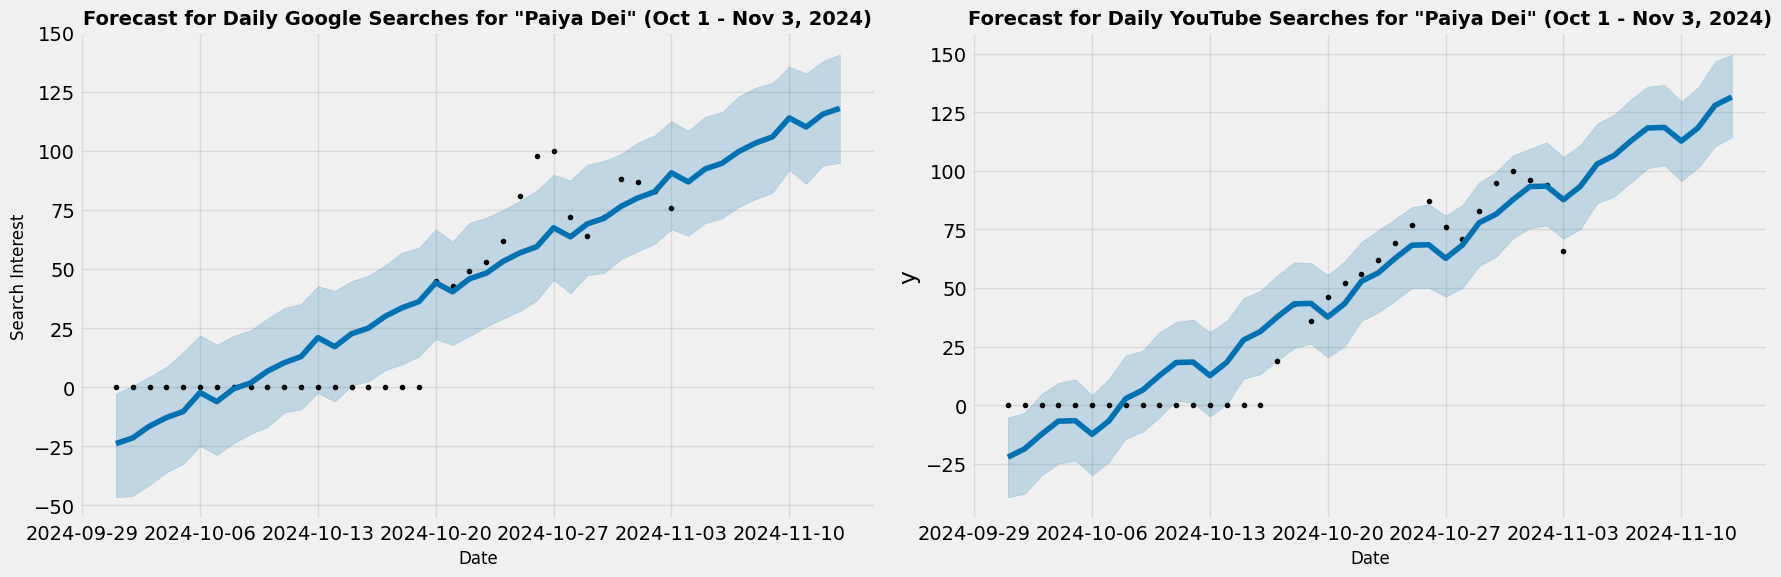

In [35]:
# Import necessary libraries
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)
keyword = ["Paiya Dei"]

# Set the date range
timeframe = '2024-10-01 2024-11-03'

# Prepare figures for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Helper function to prepare data for Prophet
def prepare_data_for_prophet(data, col_name):
    df = data.reset_index()[['date', col_name]].rename(columns={'date': 'ds', col_name: 'y'})
    return df

# --- Code 1: Google Searches Forecast ---
# Build payload and fetch interest over time for Google web search
pytrends.build_payload(kw_list=keyword, timeframe=timeframe)
data = pytrends.interest_over_time()

# Check if data is available
if not data.empty:
    if 'isPartial' in data.columns:
        data = data.drop(columns=['isPartial'])

    # Prepare data for Prophet
    google_data_for_prophet = prepare_data_for_prophet(data, 'Paiya Dei')

    # Initialize and fit the Prophet model
    model_google = Prophet()
    model_google.fit(google_data_for_prophet)

    # Make future dataframe for forecast
    future_google = model_google.make_future_dataframe(periods=10)  # Forecasting 10 days ahead
    forecast_google = model_google.predict(future_google)

    # Plot the forecast
    model_google.plot(forecast_google, ax=axs[0])
    axs[0].set_title('Forecast for Daily Google Searches for "Paiya Dei" (Oct 1 - Nov 3, 2024)', fontweight='bold', fontsize=14)
    axs[0].set_xlabel('Date', fontsize=12)
    axs[0].set_ylabel('Search Interest', fontsize=12)
else:
    print("No data available for Google web search in the specified timeframe.")

# --- Code 2: YouTube Searches Forecast ---
# Build payload and fetch interest over time for YouTube search
pytrends.build_payload(kw_list=keyword, timeframe=timeframe, gprop='youtube')
youtube_data = pytrends.interest_over_time()

# Check if data is available
if not youtube_data.empty:
    if 'isPartial' in youtube_data.columns:
        youtube_data = youtube_data.drop(columns=['isPartial'])

    # Prepare data for Prophet
    youtube_data_for_prophet = prepare_data_for_prophet(youtube_data, 'Paiya Dei')

    # Initialize and fit the Prophet model
    model_youtube = Prophet()
    model_youtube.fit(youtube_data_for_prophet)

    # Make future dataframe for forecast
    future_youtube = model_youtube.make_future_dataframe(periods=10)  # Forecasting 10 days ahead
    forecast_youtube = model_youtube.predict(future_youtube)

    # Plot the forecast
    model_youtube.plot(forecast_youtube, ax=axs[1])
    axs[1].set_title('Forecast for Daily YouTube Searches for "Paiya Dei" (Oct 1 - Nov 3, 2024)', fontweight='bold', fontsize=14)
    axs[1].set_xlabel('Date', fontsize=12)
else:
    print("No data available for YouTube search in the specified timeframe.")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Comparative Analysis of "Paiya Dei" Google and YouTube Search Trends (October 1 - November 3, 2024)

Since the song "Paiya Dei" was released in October 2024, we focus on the search interest trends post-release. The following analysis compares daily search interest on Google and YouTube, illustrating how engagement varied across these platforms.

---

## Key Observations and Comparison

1. **Initial Spike Following Release (Mid-October)**
   - Both Google and YouTube charts show an initial spike in search interest around October 18, aligning closely with the song’s release. This suggests that "Paiya Dei" quickly gained traction among listeners.
   - The synchronized spike across both platforms could imply a coordinated release strategy or viral social media campaign that effectively drove users to Google and YouTube to learn about the song and watch related videos.

2. **Differences in Growth Patterns**
   - **Google**: The Google search interest chart shows a rapid rise starting on October 18, reaching a peak around October 23. This reflects an initial wave of curiosity, with users likely looking for lyrics, artist information, or other background details about "Paiya Dei." After peaking, interest on Google fluctuates, indicating that the initial excitement leveled off with occasional surges, possibly driven by additional mentions or promotions.
   - **YouTube**: Conversely, YouTube search interest grows steadily and reaches its peak later, around October 30. This trend suggests that as people discovered the song, they increasingly sought out video content. Users may have returned to YouTube multiple times to watch the music video or related content, resulting in sustained growth rather than a quick peak and drop-off.

3. **Sustained Engagement on YouTube**
   - After peaking, YouTube maintains a relatively high level of interest through early November. This prolonged engagement implies that users were not only initially curious but continued to consume video content over time. This is typical for music releases, as listeners often revisit music videos, live performances, or reaction videos on YouTube well after the initial release.
   - On Google, however, we see a more variable trend post-peak, aligning with one-off information searches rather than the repeated engagement seen on YouTube.

4. **Temporal Difference in Peak Interest**
   - The timing of peak interest on each platform is notable. Google searches peak around October 23, while YouTube searches peak about a week later, on October 30. This staggered pattern suggests that users initially turned to Google to satisfy their curiosity about "Paiya Dei" following its release, searching for general details or background information.
   - As the song gained popularity, interest shifted to YouTube, where users engaged with the song’s video content. This behavior is common with new music releases: audiences initially learn about a song through general searches, then move to video platforms for a more immersive experience.

---

## Possible Factors Influencing the Trends

The trends observed across both platforms likely reflect a successful release strategy or external influences:
- **Coordinated Marketing Campaign**: The simultaneous rise in search interest around October 18 could indicate a coordinated promotional effort, potentially involving social media, digital ads, or influencer partnerships.
- **Viral Social Media Content**: "Paiya Dei" might have gained traction on platforms like TikTok or Instagram, where viral content often drives users to Google for additional information and then to YouTube to watch related videos.
- **Media Coverage or Influencer Endorsements**: If the song received media coverage or endorsements from popular figures, this could explain the spike in Google searches as people looked for information about the song and its artist.

---

## Conclusion

The search trends for "Paiya Dei" on Google and YouTube reflect a typical pattern for new music releases:
- **Google** served as an entry point for discovery, with users seeking general information about the song shortly after its release.
- **YouTube** became the platform for sustained engagement, as users repeatedly watched video content, likely including the official music video, covers, and reactions.

This analysis demonstrates how "Paiya Dei" successfully transitioned from initial discovery to lasting engagement. For artists and marketers, this suggests that leveraging both search engines and video platforms in a staggered release strategy can maximize audience interest, moving from initial information-based searches to deeper, repeated interactions with content on video platforms.
